<a href="https://colab.research.google.com/github/laurenaxon/ding_INFO5502_SPRING2020/blob/master/INFO_5502_Asgmt_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#PREPPING FILE

#Uploading Step 1: Download & Extract Data from kaggle
#Uploading Step 2: Select multipleChoiceResponses.csv from your local drive when prompted in output

import pandas as pd
from google.colab import files



uploaded = files.upload()



Saving multipleChoiceResponses.csv to multipleChoiceResponses (1).csv


In [54]:
#QUESTION 1

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import io
df = pd.read_csv(io.StringIO(uploaded['multipleChoiceResponses.csv'].decode('utf-8')))


question_names = df.iloc[0]
df = df.drop(0, axis=0)

#Income Question: Removing any question w/o numerical response
df = df[df['Q9'].notnull()]
df = df[df['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

#Gender Question: Removing any non F or M responses
df = df[df['Q1'] != "Prefer not to say"]
df = df[df['Q1'] != "Prefer to self-describe"]

#Converting Income Range to Singular Numerical Value
#Used Range Median as New Value in Dictionary

dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, '40-50,000': 45000, 
  '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, '80-90,000': 85000, '90-100,000': 95000, 
  '100-125,000': 112500, '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, '250-300,000': 275000, 
  '300-400,000': 350000, '400-500,000': 450000, '500,000+':500000}


#Applied dictionary to new column titled 'target'
df['target'] = df['Q9'].apply(lambda x: dic[x])

#Median Income by Gender
df.groupby('Q1')['target'].median()


User uploaded file "multipleChoiceResponses.csv" with length 41189695 bytes


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Q1
Female    25000
Male      35000
Name: target, dtype: int64

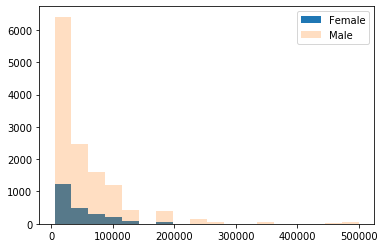

In [55]:
#QUESTION 2

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline




df_fem = df[df['Q1'] != "Male"]

df_male = df[df['Q1'] != "Female"]


plt.hist(df_fem['target'], bins=18, label='Female')
plt.hist(df_male['target'], bins=18, label='Male', alpha = 0.25)
plt.legend(loc='best')
plt.show()


In [0]:
#QUESTION 3 - PART A

df2 = df.sample(500, replace=False)


QUESTION 3 - PART B

Test Statistic: Mean/Average

Null Hypothesis: There is not a statistically significant diffierence between male and female average income

Alternative Hypothesis: There is a statistically significant difference between male and female average income



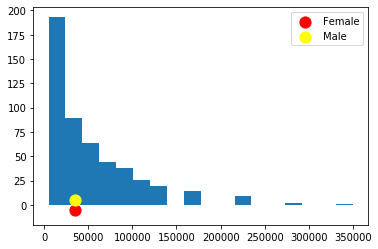

In [64]:
#QUESTION 3 - PART C

df2_fem = df2[df2['Q1'] != "Male"]
df2_male = df2[df2['Q1'] != "Female"]

plt.hist(df2['target'], bins=18)

plt.scatter(df2_fem['target'].median(), -5, s=125,color='red', label='Female', zorder=10)
plt.scatter(df2_male['target'].median(), 5, s=125,color='yellow', label='Male', zorder=10)

plt.legend(loc='best')

plt.show()

Female Standard Deviation : 53072.2891566265
Numbers of Females in Sample :  83
Male Standard Deviation :  49028.77697841726
Numbers of Males in Sample :  417


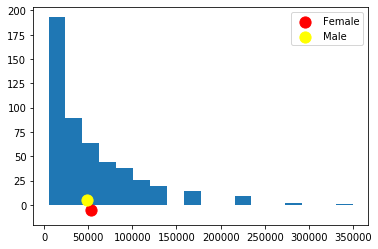

In [65]:
#QUESTION 3 - PART D

import  statistics

fem2_mean = statistics.mean(df2_fem['target'])
male2_mean = statistics.mean(df2_male['target'])

print('Female Standard Deviation :' , fem2_mean)
print('Numbers of Females in Sample : ' , len(df2_fem))
print('Male Standard Deviation : ' , male2_mean)
print('Numbers of Males in Sample : ' , len(df2_male))

plt.hist(df2['target'], bins=18)

plt.scatter(fem2_mean, -5, s=125,color='red', label='Female', zorder=10)
plt.scatter(male2_mean,5, s=125,color='yellow', label='Male', zorder=10)

plt.legend(loc='best')

plt.show()

In [0]:
#QUESTION 3 - PART E

resample = df2.sample(5000, replace=True)


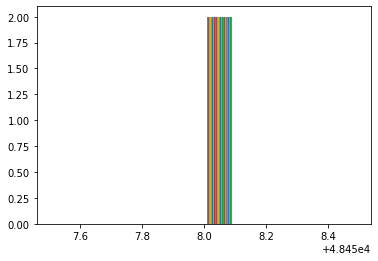

In [79]:
#QUESTION 3 - PART F

resample_mean = statistics.mean(resample['target'])

resample.insert(12, "Mean Income", resample_mean, True)

plt.hist(resample['Mean Income'])

plt.show()

WHEN LOOKING AT THE HISTOGRAMS OF MEAN INCOME BETWEEN THE TWO GENDERS, AT LEAST IN THIS LIMITED SAMPLE, THERE DOES NOT SEEM TO BE A LARGE MARGIN OF DIFFERENCE.